In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [2]:
df=df.drop('Person ID',axis=1)

In [3]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
sorted(df['Gender'].unique())

['Female', 'Male']

In [5]:
sorted(df['Occupation'].unique())

['Accountant',
 'Doctor',
 'Engineer',
 'Lawyer',
 'Manager',
 'Nurse',
 'Sales Representative',
 'Salesperson',
 'Scientist',
 'Software Engineer',
 'Teacher']

In [6]:
sorted(df['BMI Category'].unique())

['Normal', 'Normal Weight', 'Obese', 'Overweight']

In [7]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,3,2,4,3,3,11,10,6,1
1,1,1,1,4,2,9,5,0,9,8,19,1
2,1,1,1,4,2,9,5,0,9,8,19,1
3,1,1,6,1,0,0,5,2,22,17,0,2
4,1,1,6,1,0,0,5,2,22,17,0,2


In [8]:
# # Dividing dependent and independent variables
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [9]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 219, 2: 219, 0: 219})


In [10]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.92      0.94      0.93        64
           2       0.91      0.95      0.93        63

    accuracy                           0.92       165
   macro avg       0.91      0.90      0.91       165
weighted avg       0.92      0.92      0.91       165



Text(50.72222222222221, 0.5, 'Actual Label')

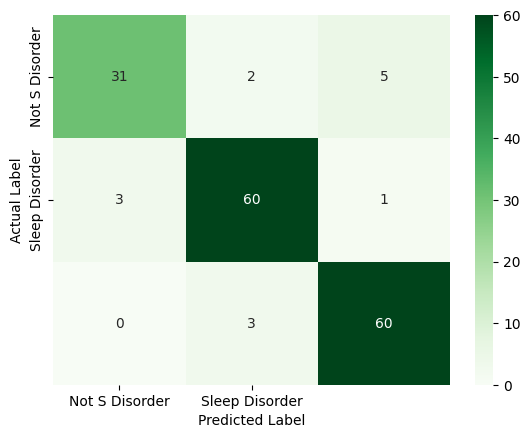

In [14]:
# Confusion Matrix
x_axis_labels = ['Not S Disorder','Sleep Disorder']
y_axis_labels = ['Not S Disorder','Sleep Disorder']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [15]:
#Dicision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.91      0.91      0.91        64
           2       0.94      0.92      0.93        63

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



Text(50.72222222222221, 0.5, 'Actual Label')

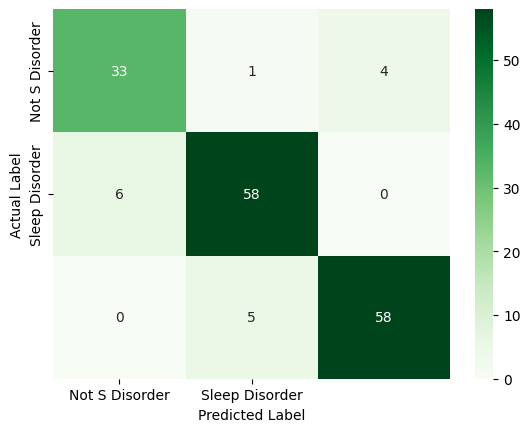

In [17]:
# Confusion Matrix
x_axis_labels = ['Not S Disorder','Sleep Disorder']
y_axis_labels = ['Not S Disorder','Sleep Disorder']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81        38
           1       0.91      0.91      0.91        64
           2       0.90      0.95      0.92        63

    accuracy                           0.89       165
   macro avg       0.88      0.87      0.88       165
weighted avg       0.89      0.89      0.89       165



Text(50.72222222222221, 0.5, 'Actual Label')

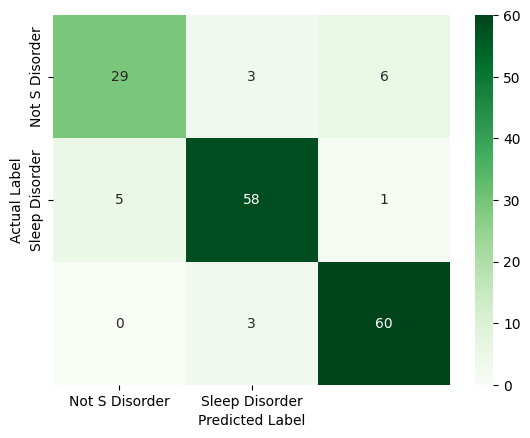

In [20]:
# Confusion Matrix
x_axis_labels = ['Not S Disorder','Sleep Disorder']
y_axis_labels = ['Not S Disorder','Sleep Disorder']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        38
           1       0.93      0.97      0.95        64
           2       0.94      0.95      0.94        63

    accuracy                           0.93       165
   macro avg       0.93      0.92      0.93       165
weighted avg       0.93      0.93      0.93       165



Text(50.72222222222221, 0.5, 'Actual Label')

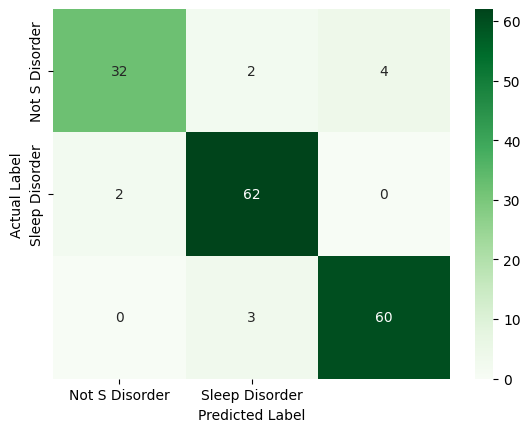

In [23]:
# Confusion Matrix
x_axis_labels = ['Not S Disorder','Sleep Disorder']
y_axis_labels = ['Not S Disorder','Sleep Disorder']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [24]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))

In [25]:
# Loading model to compare the results
#Use 3 number patient Data
model = pickle.load(open('pickle.pkl','rb'))
print(rf_model.predict([[1,1,6,1,0,0,5,2,22,17,0]]))

[2]


In [26]:
df[df['Sleep Disorder']==2]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,1,1,6,1,0,0,5,2,22,17,0,2
4,1,1,6,1,0,0,5,2,22,17,0,2
16,0,2,5,7,1,3,4,1,18,12,4,2
17,1,2,1,2,2,0,5,0,6,4,18,2
30,0,3,5,6,1,2,4,1,16,11,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,30,5,22,5,12,0,3,23,2,15,2
370,0,30,5,21,5,12,0,3,23,2,15,2
371,0,30,5,22,5,12,0,3,23,2,15,2
372,0,30,5,22,5,12,0,3,23,2,15,2


In [27]:
# So my model Working perfectly